In [1]:
import base64
import os
from io import BytesIO

import matplotlib.pyplot as plt
import requests
from PIL import Image

In [2]:
main_url = "http://localhost:8000"

In [3]:
resp_get = requests.get(main_url)
resp_get.json()

{'message': 'Welcome to the PaliGemma Segmentation API!',
 'model': 'google/paligemma2-3b-mix-448'}

In [4]:
segm_url = os.path.join(main_url, "segment")
data = {
    'prompt': 'segment left wheel',
    'image_url': "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
}
resp_post = requests.post(segm_url, data=data)
resp_post.json()

{'message': [{'mask': 'iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAAAAACPAi4CAAAF5klEQVR4nG1XW2tdRRT+1px9zmluTcxRm1ZbY5t612LTovhQbSUqiiiIIooUhFLwzQdBq/gDFF/Fl+INwXtBEBXF1vSiohExRkTTS9oUU3uR5npy9pn5fJjZM7P3OfOQM3tn1rfWrO+bNWsL/BBRpChSCCWVju7e3trKWm+ttyOdmfrrrzOzAIR+Ne2DRAAKAhFCSc+6mzdcveqSSzrLFVYTQKezZ8YOHJxZRrScRQAoVS0lie66bGjHrVd1l0tUAEUoAGgw//foJxMXISBinGhaXn3T4MqevtoV6/qrKIFig3S/AtM4/dVbvzVy9hGAVIYf2TaQVFWFpUSEFAgFzpgQAFyYee+dE6YYhQO46d3ppbTRbOqm1toYrY0fNDSkMaSe/XR7pdUYAFbumW4YaqONLgCQFoCGJJfHd/W0s5c7v6sbY7TWxlpGARhDknQTPfVSfxuAS1+9YGiM0UYbXTB3CNlM//NyK4I8MJ5av7poa8O3O7DZMNPPh10oy8P6j+p05rroOkNwiTBkOr276l0LAHTvOadZ9OzcR1tw26DRvz1YipQg5QcmWgLP2WchkI7UdPSOUpSAwQ/rxvg0tYOx/kmPWP94SAGAAoDKyLayCNrKK/cDv0Yq9+zqyd7Khm9TuhFy14YGhhhIPfVo2UVQ2rE5Yc6pSC4Ygozmjr41T1/lAAYe6oTdgDs39uiIJ0lEBLQ4LmwSybb7qhZgy5bE2tDju2OcG/5ZIBAAlZF+gQK67+9HVqwkJC1sIw8kQhdNafgGgUJp6M7EvbHHPoseApGieUiUiPRvLUNBblsTdi/0RBG26NEm0U7FTiAAiRWbVkBJ15aqivYZl13nnbYsgjYeBwWAV9eg5Mqbs8SKy45ky0kw5MUai+XFvlh7BZS67krFbOM5+unWeu5CUoU2mT2DKqle2

In [5]:
my_resp = resp_post.json()
my_resp

{'message': [{'mask': 'iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAAAAACPAi4CAAAF5klEQVR4nG1XW2tdRRT+1px9zmluTcxRm1ZbY5t612LTovhQbSUqiiiIIooUhFLwzQdBq/gDFF/Fl+INwXtBEBXF1vSiohExRkTTS9oUU3uR5npy9pn5fJjZM7P3OfOQM3tn1rfWrO+bNWsL/BBRpChSCCWVju7e3trKWm+ttyOdmfrrrzOzAIR+Ne2DRAAKAhFCSc+6mzdcveqSSzrLFVYTQKezZ8YOHJxZRrScRQAoVS0lie66bGjHrVd1l0tUAEUoAGgw//foJxMXISBinGhaXn3T4MqevtoV6/qrKIFig3S/AtM4/dVbvzVy9hGAVIYf2TaQVFWFpUSEFAgFzpgQAFyYee+dE6YYhQO46d3ppbTRbOqm1toYrY0fNDSkMaSe/XR7pdUYAFbumW4YaqONLgCQFoCGJJfHd/W0s5c7v6sbY7TWxlpGARhDknQTPfVSfxuAS1+9YGiM0UYbXTB3CNlM//NyK4I8MJ5av7poa8O3O7DZMNPPh10oy8P6j+p05rroOkNwiTBkOr276l0LAHTvOadZ9OzcR1tw26DRvz1YipQg5QcmWgLP2WchkI7UdPSOUpSAwQ/rxvg0tYOx/kmPWP94SAGAAoDKyLayCNrKK/cDv0Yq9+zqyd7Khm9TuhFy14YGhhhIPfVo2UVQ2rE5Yc6pSC4Ygozmjr41T1/lAAYe6oTdgDs39uiIJ0lEBLQ4LmwSybb7qhZgy5bE2tDju2OcG/5ZIBAAlZF+gQK67+9HVqwkJC1sIw8kQhdNafgGgUJp6M7EvbHHPoseApGieUiUiPRvLUNBblsTdi/0RBG26NEm0U7FTiAAiRWbVkBJ15aqivYZl13nnbYsgjYeBwWAV9eg5Mqbs8SKy45ky0kw5MUai+XFvlh7BZS67krFbOM5+unWeu5CUoU2mT2DKqle2

In [6]:
mask_base54 = my_resp["message"][0]["mask"]
image_data = base64.b64decode(mask_base54)

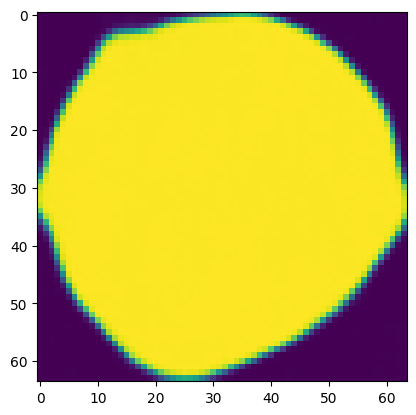

In [7]:
image = Image.open(BytesIO(image_data))
plt.imshow(image)